<a href="https://colab.research.google.com/github/cotpetru24/data_mining/blob/main/stu124543_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Import dataset => pd.read_excel() & pd.read_csv()

In [129]:
# 1 - Import the dataset
df_temp = pd.read_excel("/content/Lobster_Data_Set.xlsx")
# 2 - Convert the dataset to .csv
df_temp.to_csv("/content/lobster_data_set.csv", index = False)
# 3 - Import the dataset in .csv format
df = pd.read_csv("lobster_data_set.csv")

Print the shape and info of the dataframe => df.shape() & df.info()

In [130]:
print(f"Dataset shape = {df.shape}\n")
print("Dataset info\n")
print(df.info())

Dataset shape = (2097, 8)

Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               2097 non-null   object 
 1   Length(mm)        2095 non-null   float64
 2   Diameter(mm)      2096 non-null   float64
 3   Height(mm)        2096 non-null   float64
 4   WholeWeight(g)    2096 non-null   float64
 5   ShuckedWeight(g)  2095 non-null   float64
 6   SellWeight(g)     2096 non-null   float64
 7   Spots             2097 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 131.2+ KB
None


Preview the dataset - df.head()

In [131]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("Dataset preview:\n")
print(df.head(10))

Dataset preview:

  Sex  Length(mm)  Diameter(mm)  Height(mm)  WholeWeight(g)  ShuckedWeight(g)  SellWeight(g)  Spots
0   M       0.455         0.365       0.095          0.5140            0.2245          0.150     15
1   M       0.350         0.265       0.090          0.2255            0.0995          0.070      7
2   F       0.530         0.420       0.135          0.6770            0.2565          0.210      9
3   M       0.440         0.365       0.125          0.5160            0.2155          0.155     10
4   I       0.330         0.255       0.080          0.2050            0.0895          0.055      7
5   I       0.425         0.300       0.095          0.3515            0.1410          0.120      8
6   F       0.530         0.415       0.150          0.7775            0.2370          0.330     20
7   F       0.545         0.425       0.125          0.7680            0.2940          0.260     16
8   M       0.475         0.370       0.125          0.5095            0.2165     

Display only categorical data

In [132]:
df_categorical = df.select_dtypes(exclude=np.number)
print(df_categorical)

     Sex
0      M
1      M
2      F
3      M
4      I
...   ..
2092   M
2093   F
2094   I
2095   M
2096   M

[2097 rows x 1 columns]


Identify the unique values of the 'Sex' column

In [133]:
print(df_categorical.Sex.value_counts())

M    771
I    683
F    641
0      2
Name: Sex, dtype: int64


Drop the rows where "Sex" == '0'

In [134]:
condition = df[(df['Sex'] == '0')].index
clean_df = df.drop(condition)

Confirm dataframe doesn't contain rows where 'Sex' == '0'

In [135]:
clean_df_categorical = clean_df.select_dtypes(exclude=np.number)
print(clean_df_categorical.Sex.value_counts())

M    771
I    683
F    641
Name: Sex, dtype: int64


Replace categorical data with numerical and store the unique values of the numerical data in a dictionary

In [136]:
sex_categorical = { 1: 'M', 2: 'F', 3: 'I'}
clean_df['Sex'].replace({'M': 1, 'F': 2, 'I': 3}, inplace=True)


Confirm categorical values have been replaced and dataframe has been updated

In [137]:
print(clean_df.info())
print(clean_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               2095 non-null   int64  
 1   Length(mm)        2093 non-null   float64
 2   Diameter(mm)      2094 non-null   float64
 3   Height(mm)        2094 non-null   float64
 4   WholeWeight(g)    2094 non-null   float64
 5   ShuckedWeight(g)  2093 non-null   float64
 6   SellWeight(g)     2094 non-null   float64
 7   Spots             2095 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 147.3 KB
None
      Sex  Length(mm)  Diameter(mm)  Height(mm)  WholeWeight(g)  ShuckedWeight(g)  SellWeight(g)  Spots
0       1       0.455         0.365       0.095          0.5140            0.2245          0.150     15
1       1       0.350         0.265       0.090          0.2255            0.0995          0.070      7
2       2       0.530         0.420       0.135        

Drop irrelevant columns

In [138]:
clean_df.drop(['Spots', 'Height(mm)', 'SellWeight(g)', 'ShuckedWeight(g)'], axis=1, inplace=True)


Checking the dataset for missing values and printing the total number of cells where value is missing

In [139]:
print("Number of cells where value is missing - each column:")
print(clean_df.isnull().sum())
print(f"\nTotal number of cells where value is missing : {clean_df.isnull().sum().sum()}")

Number of cells where value is missing - each column:
Sex               0
Length(mm)        2
Diameter(mm)      1
WholeWeight(g)    1
dtype: int64

Total number of cells where value is missing : 4


Conditionally fill missing values with the median value of each column based on Sex
Confirm there are no more missing values

In [140]:
clean_df.loc[clean_df['Sex'] == 1] = (
    clean_df.loc[clean_df['Sex'] == 1].fillna(value=clean_df.loc[clean_df['Sex'] == 1].median(axis=0)))
clean_df.loc[clean_df['Sex'] == 2] = (
    clean_df.loc[clean_df['Sex'] == 2].fillna(value=clean_df.loc[clean_df['Sex'] == 2].median(axis=0)))
clean_df.loc[clean_df['Sex'] == 3] = (
    clean_df.loc[clean_df['Sex'] == 3].fillna(value=clean_df.loc[clean_df['Sex'] == 3].median(axis=0)))

print("\nNumber of cells where value is missing after .fillna() - each column:")
print(clean_df.isnull().sum())
print(f"\nTotal number of cells where value is missing after .fillna() : {clean_df.isnull().sum().sum()}")


Number of cells where value is missing after .fillna() - each column:
Sex               0
Length(mm)        0
Diameter(mm)      0
WholeWeight(g)    0
dtype: int64

Total number of cells where value is missing after .fillna() : 0


View descriptive statistics - df.describe()

In [141]:
print(clean_df.describe())

               Sex   Length(mm)  Diameter(mm)  WholeWeight(g)
count  2095.000000  2095.000000   2095.000000     2095.000000
mean      1.957995     0.521050      0.405721        0.818757
std       0.832226     0.122029      0.101145        0.495660
min       1.000000     0.000000      0.000000        0.000000
25%       1.000000     0.450000      0.345000        0.430750
50%       2.000000     0.540000      0.425000        0.793000
75%       3.000000     0.610000      0.480000        1.133250
max       3.000000     0.815000      0.650000        2.825500


Check for outliers using boxplot

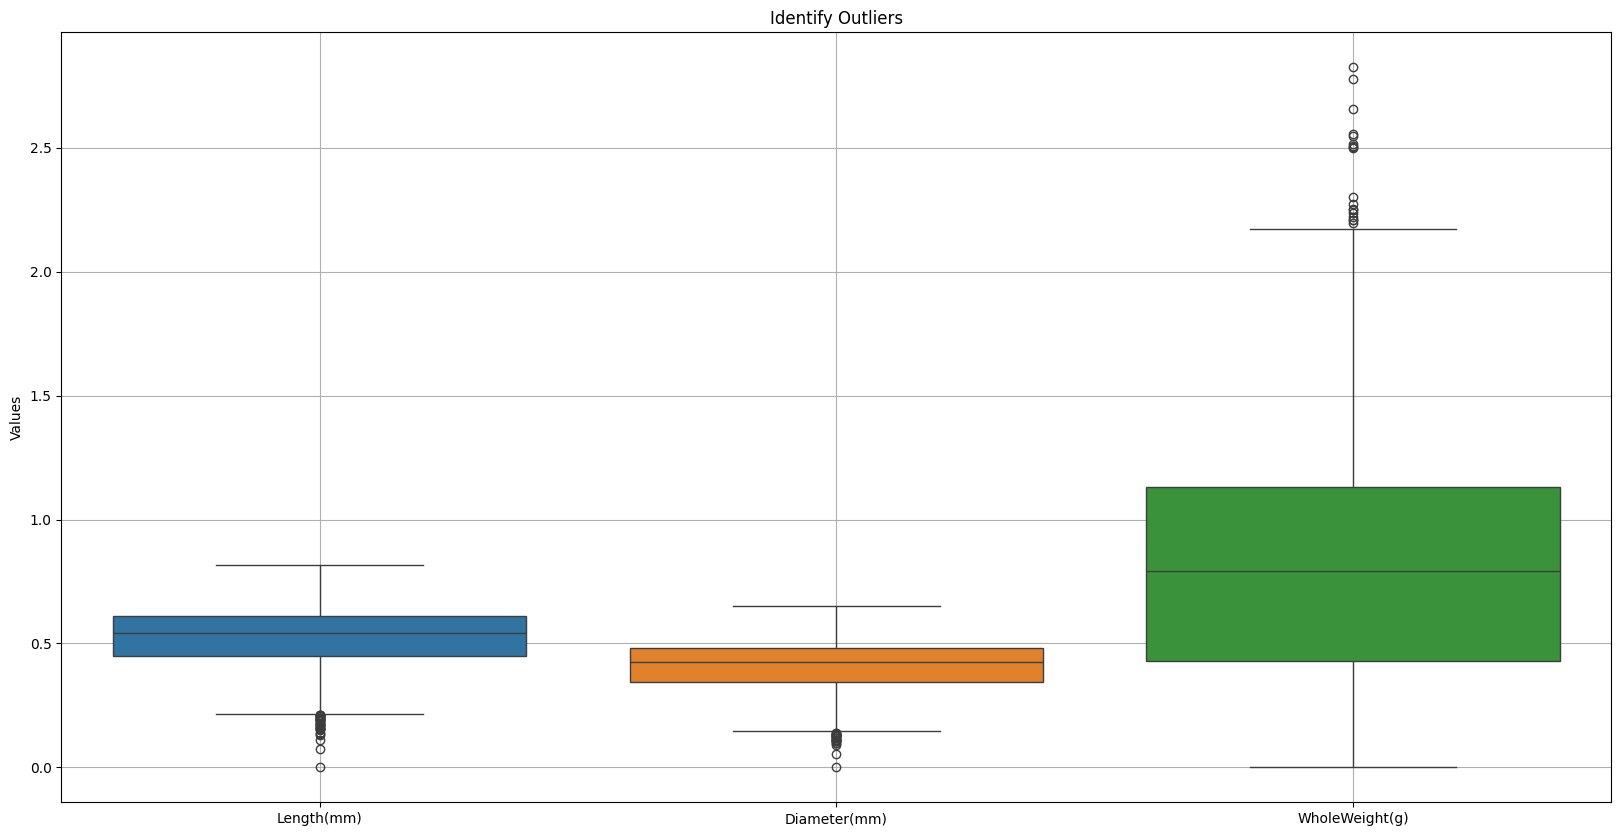

In [142]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.boxplot(data=clean_df.iloc[:,1:], orient='v')
plt.ylabel('Values')
plt.title('Identify Outliers')
plt.grid(True)
plt.show()

Remove outliers using the Interquartile range (IQR) method

In [161]:
columns = ['Length(mm)', 'Diameter(mm)', 'WholeWeight(g)']
for col in columns:
    Q1 = np.percentile(clean_df[col], 25, interpolation='midpoint')
    Q2 = np.percentile(clean_df[col], 50, interpolation='midpoint')
    Q3 = np.percentile(clean_df[col], 75, interpolation='midpoint')
    print(f"{col} percentiles are=> 0.25: {Q1}, 0.50: {Q2}, 0.75: {Q3}")
    IQR = Q3 - Q1
    print(f"{col} IQR is {IQR}\n")
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #clean_df = clean_df[(clean_df[col] > lower_bound) & (clean_df[col] < upper_bound)]

    clean_df = clean_df[((clean_df[col] > lower_bound) & (clean_df[col] > 0)) & (clean_df[col] < upper_bound)]

Length(mm) percentiles are=> 0.25: 0.45, 0.50: 0.54, 0.75: 0.61
Length(mm) IQR is 0.15999999999999998

Diameter(mm) percentiles are=> 0.25: 0.35, 0.50: 0.425, 0.75: 0.475
Diameter(mm) IQR is 0.125

WholeWeight(g) percentiles are=> 0.25: 0.447, 0.50: 0.7965, 0.75: 1.1315
WholeWeight(g) IQR is 0.6844999999999999



Confirm outliers have been removed

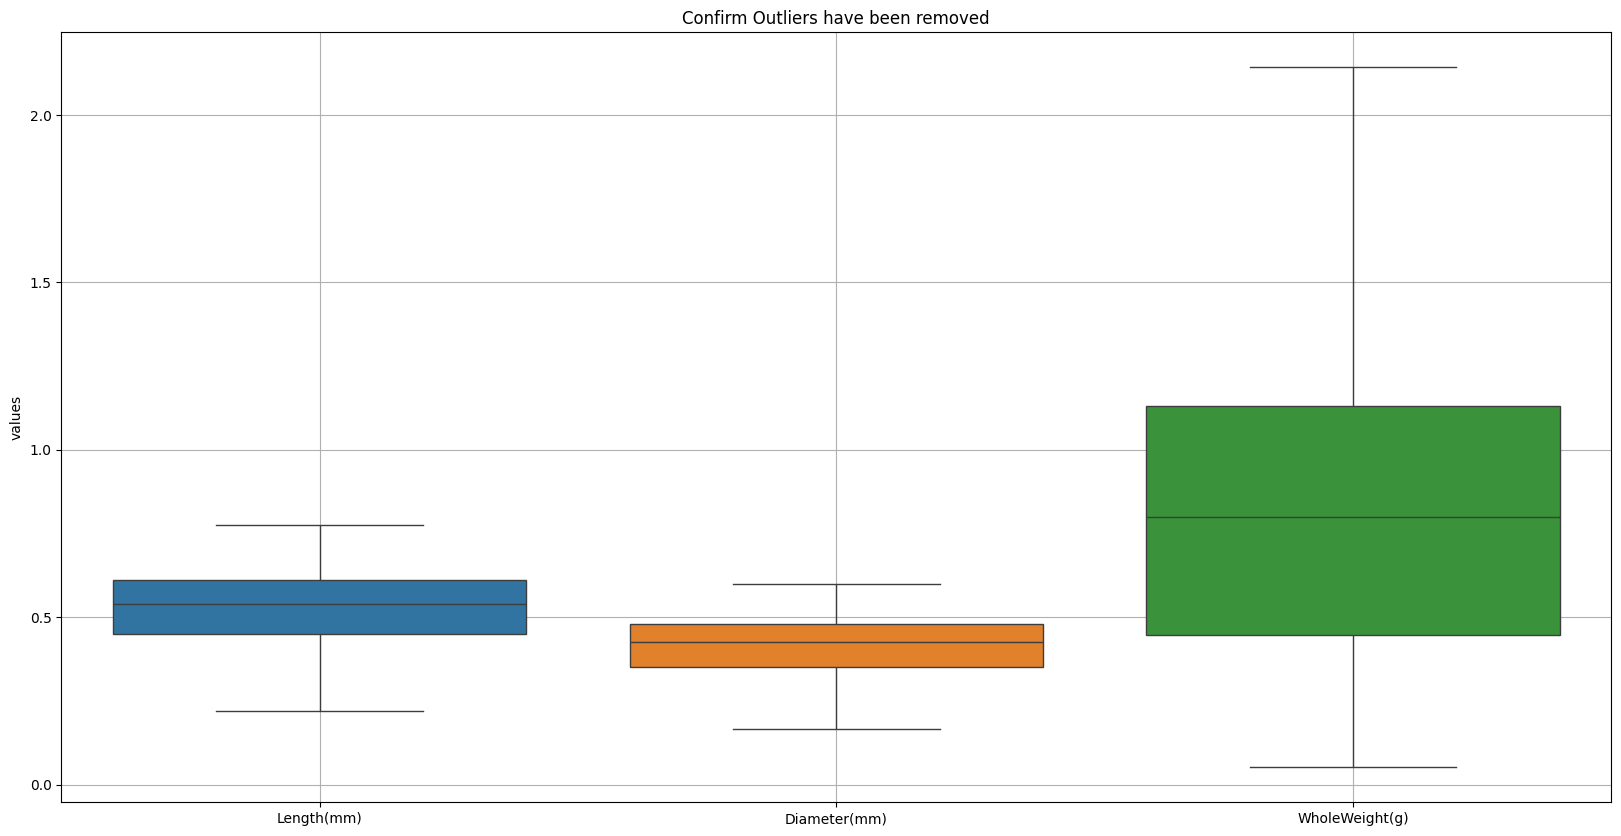

In [162]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.boxplot(data=clean_df.iloc[:,1:], orient='v')
plt.ylabel('values')
plt.title('Confirm Outliers have been removed')
plt.grid(True)
plt.show()

View descriptive statistics after outliers have been removed

In [163]:
print(clean_df.describe())

               Sex   Length(mm)  Diameter(mm)  WholeWeight(g)
count  2029.000000  2029.000000   2029.000000     2029.000000
mean      1.951207     0.525860      0.409308        0.820042
std       0.828537     0.111412      0.092908        0.463764
min       1.000000     0.220000      0.165000        0.051500
25%       1.000000     0.450000      0.350000        0.448000
50%       2.000000     0.540000      0.425000        0.798000
75%       3.000000     0.610000      0.480000        1.131500
max       3.000000     0.775000      0.600000        2.142500


Distribution of each variable

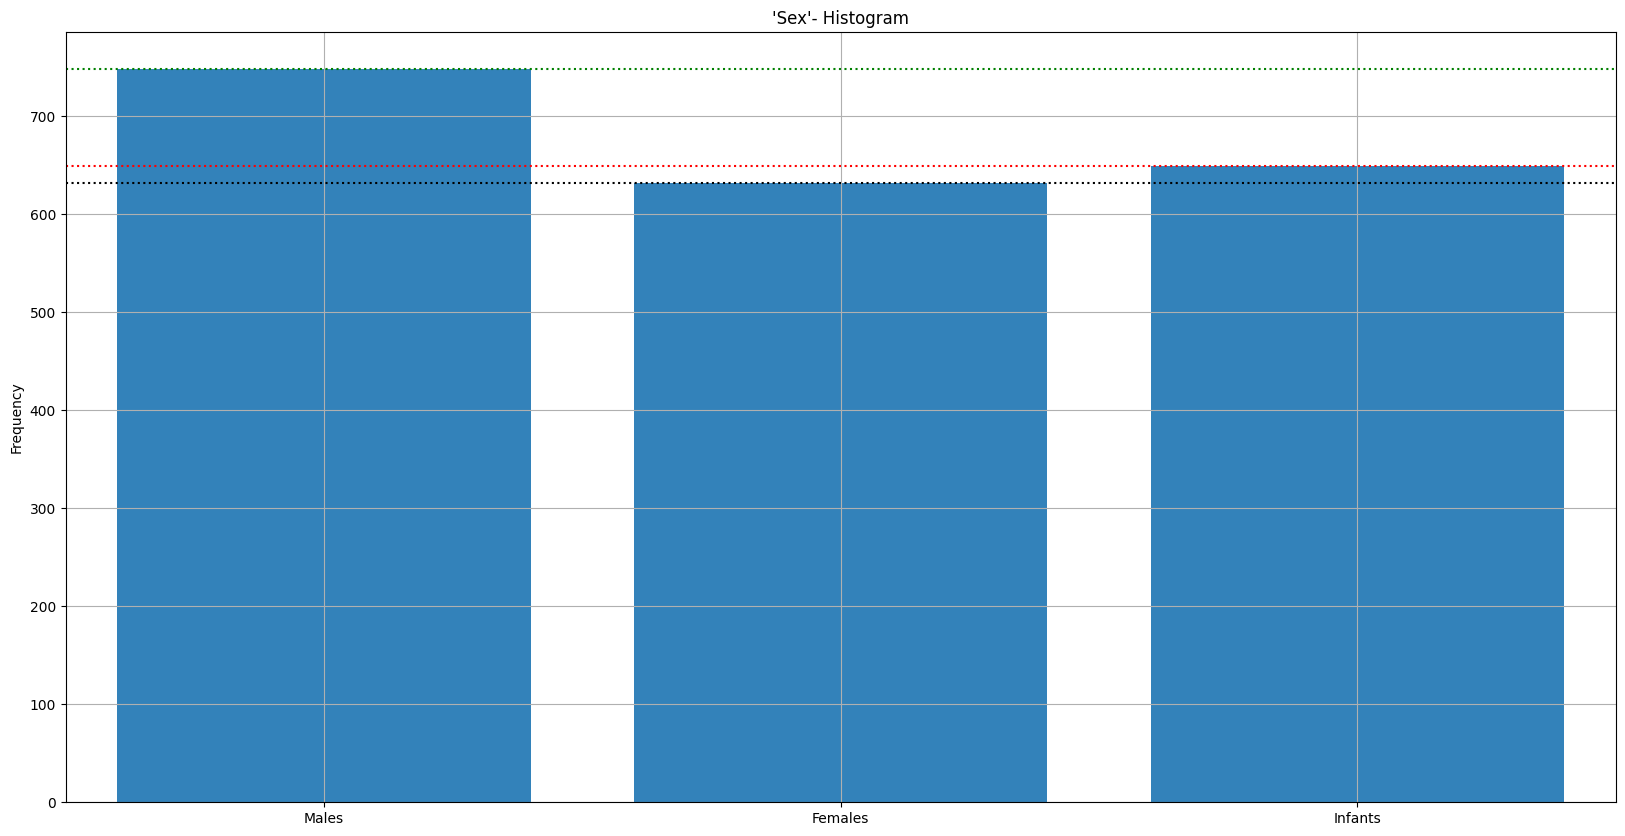

In [164]:
counts = clean_df['Sex'].value_counts().sort_index()
line_colors = ['green', 'black', 'red']
fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values, tick_label=['Males', 'Females', 'Infants'], alpha=0.7)
plt.xlim(0.5, 3.5)
xlims = plt.xlim()
# Adding horizontal lines across the plot for each bar, with different colors
for bar, color in zip(bars, line_colors):
    plt.hlines(bar.get_height(), xlims[0], xlims[1], color=color, linestyles='dotted')

plt.hist(data=clean_df, x='Sex', rwidth=0.8, bins=[0.5, 1.5, 2.5, 3.5], alpha=0.7)
plt.title("'Sex'- Histogram")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

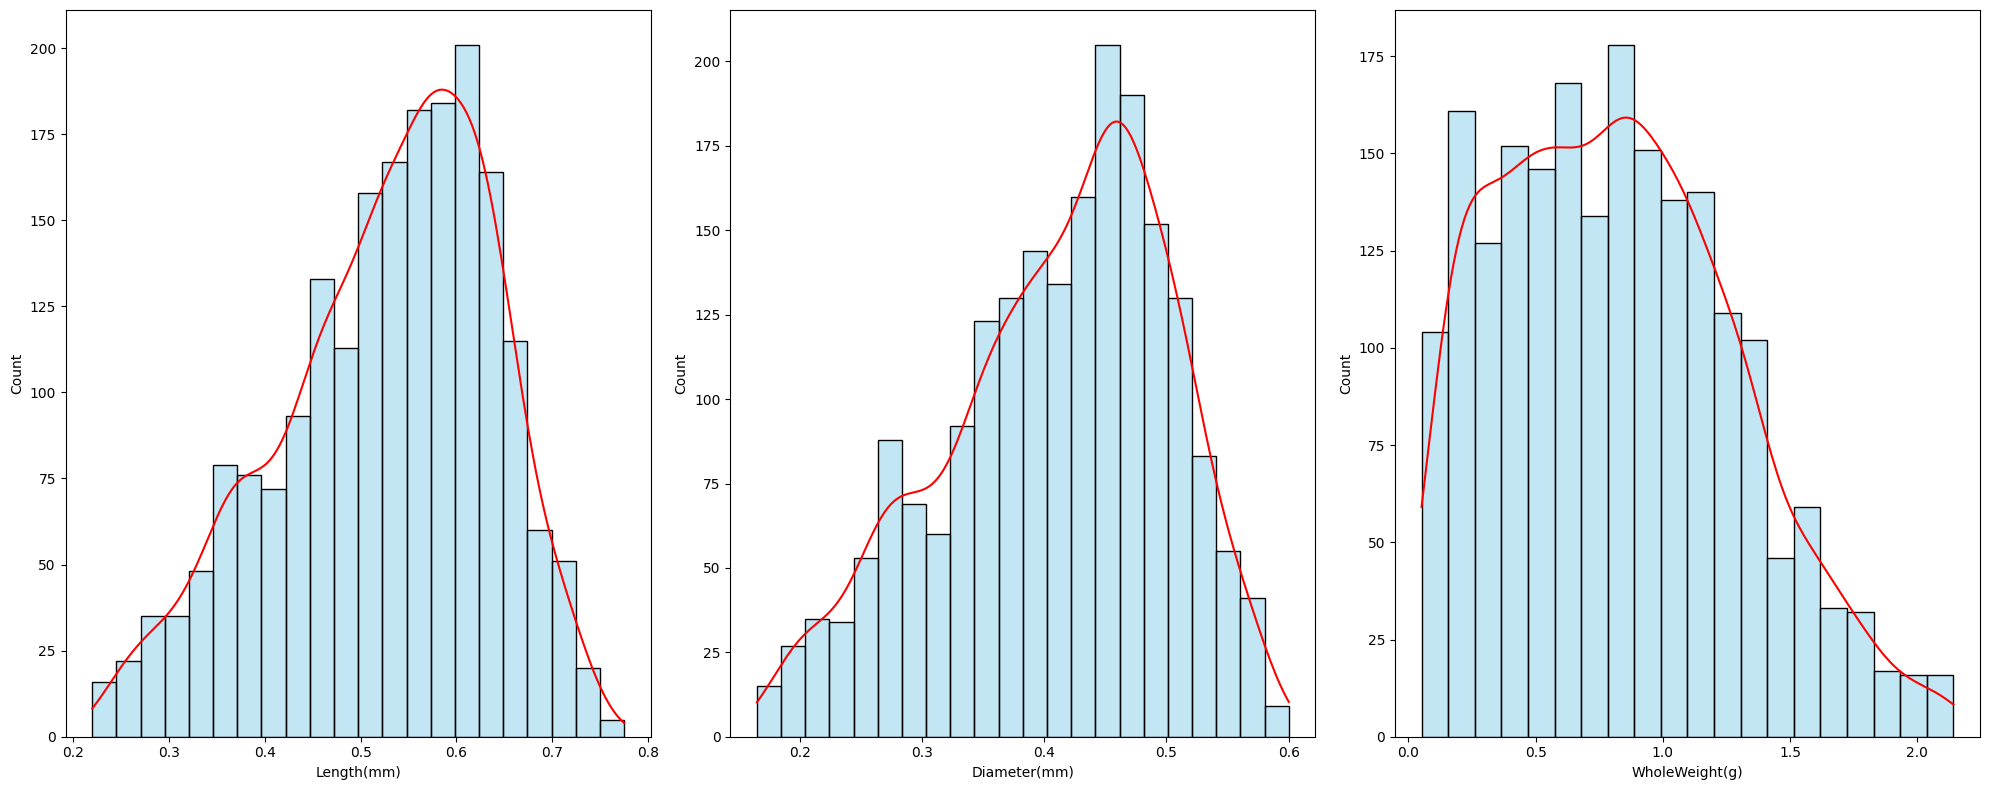

In [165]:
plt.figure(figsize=(20, 8))
plotnumber=1
for col in ['Length(mm)', 'Diameter(mm)', 'WholeWeight(g)']:
    if plotnumber <= 3:
        plt.subplot(1,3, plotnumber)
        plot = sns.histplot(clean_df[col], kde=True, color='skyblue')
        plot.lines[0].set_color('red')
    plotnumber+=1
plt.tight_layout()
plt.show()

Pie chart for "Sex" column

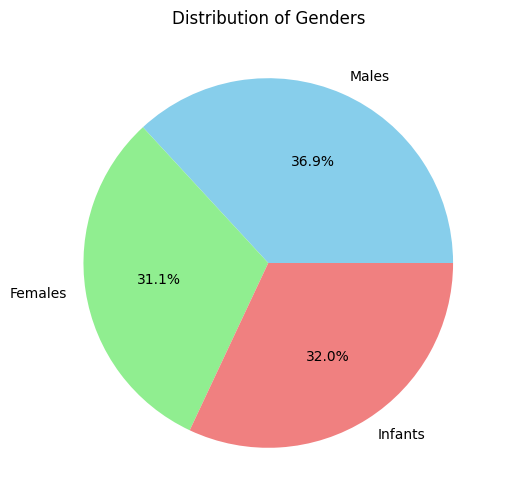

In [166]:
labels = ['Males', 'Females', 'Infants']
colors = ['skyblue', 'lightgreen', 'lightcoral']
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Genders')
plt.show()

Scatter plots

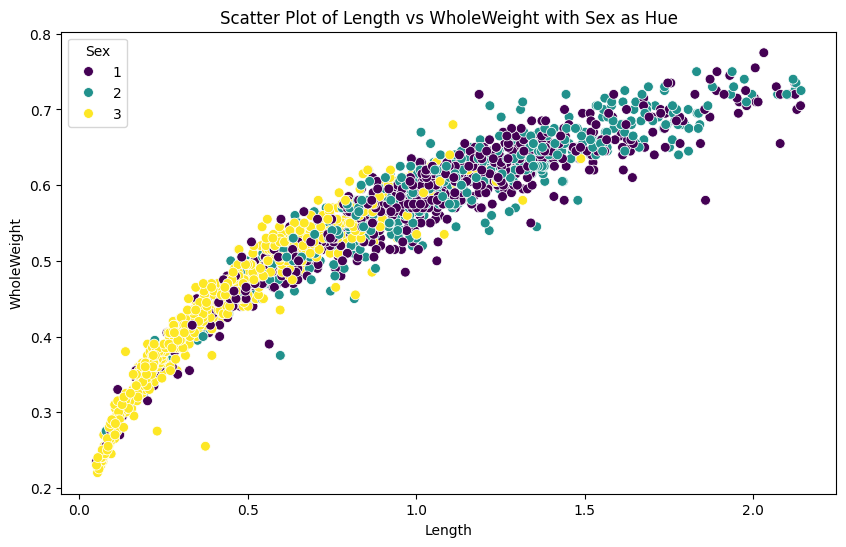

In [167]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='WholeWeight(g)', y='Length(mm)', hue='Sex', palette='viridis', s=50)
plt.xlabel('Length')
plt.ylabel('WholeWeight')
plt.title('Scatter Plot of Length vs WholeWeight with Sex as Hue')
plt.legend(title='Sex')
plt.show()

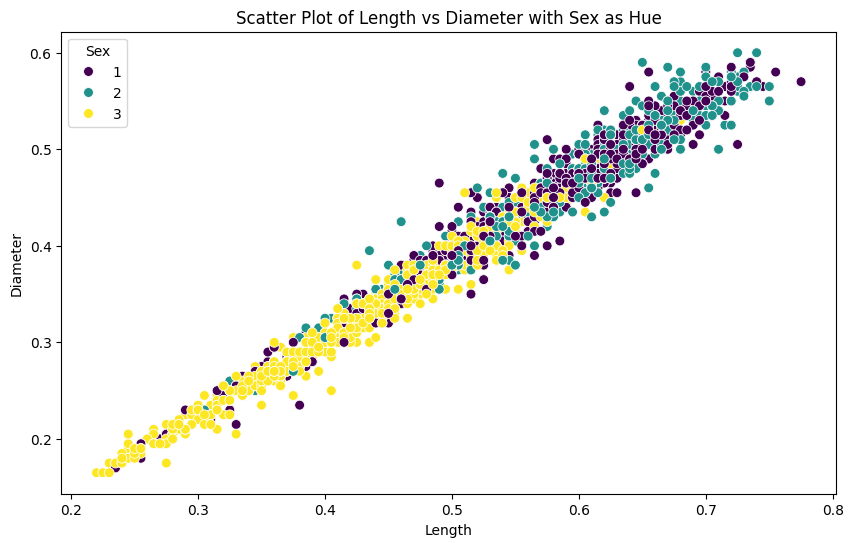

In [168]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='Length(mm)', y='Diameter(mm)', hue='Sex', palette='viridis', s=50)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Scatter Plot of Length vs Diameter with Sex as Hue')
plt.legend(title='Sex')
plt.show()

Linear regression

In [180]:
# Swapping the roles of X and y
X = clean_df[['WholeWeight(g)']]  # Now X represents WholeWeight(g)
y = clean_df['Length(mm)']        # Now y represents Length(mm)

# Dividing the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

# Selecting the linear regression method from the scikit-learn library
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the trained model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"R^2 Score: {r2:.5f}")


Mean Squared Error: 0.00137
R^2 Score: 0.88742


Scatter plot for linear regression and regression line

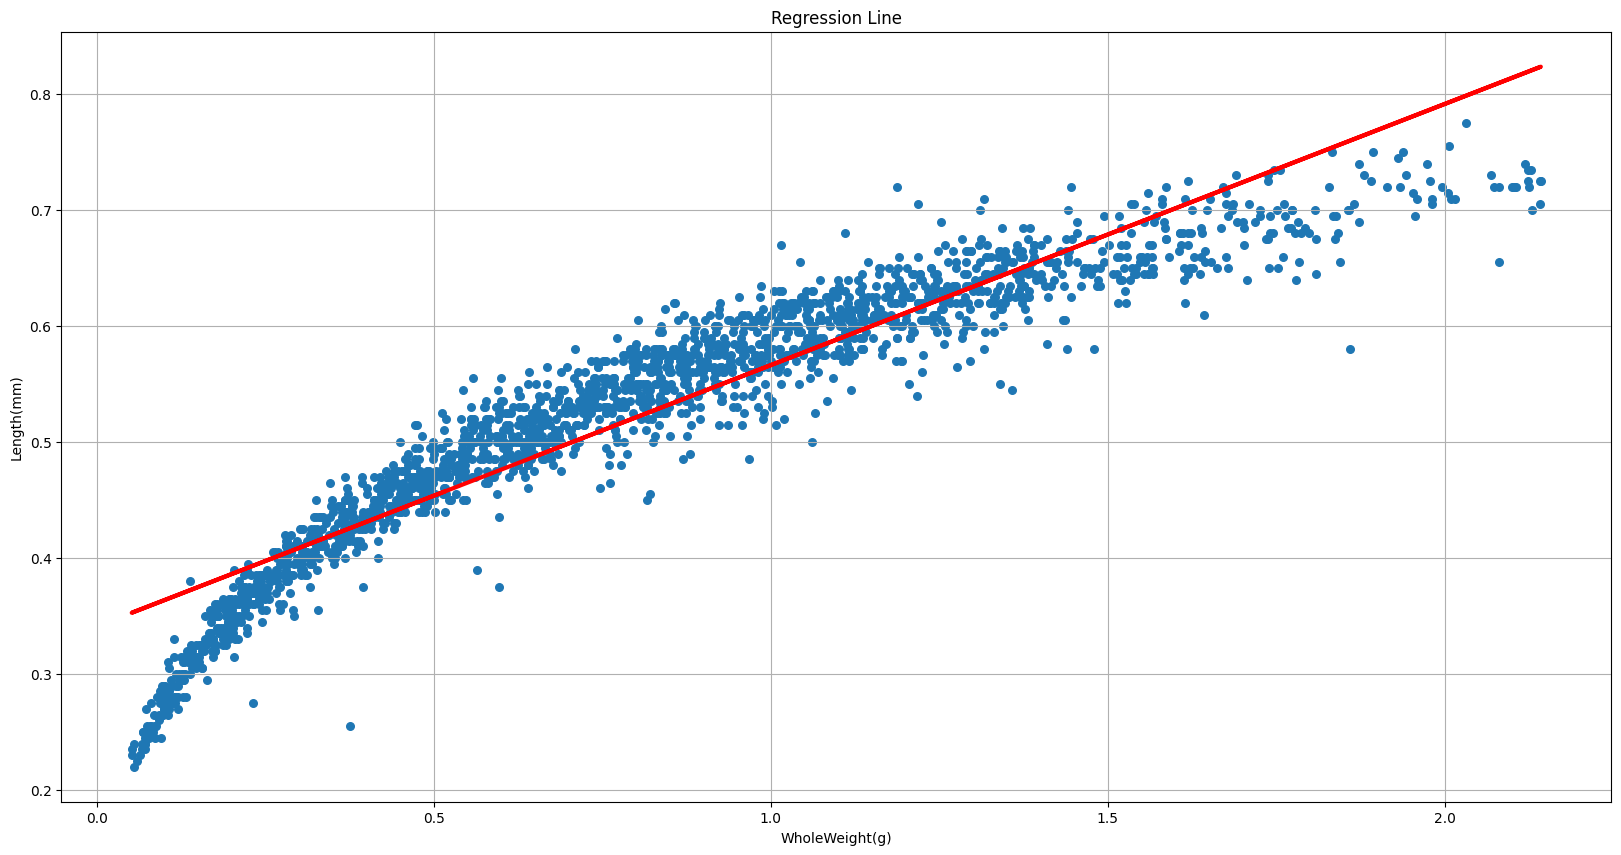

In [193]:
# Swapping the assignment of X and y
X = clean_df['WholeWeight(g)'].values.reshape(-1, 1)  # WholeWeight on x-axis
y = clean_df[['Length(mm)']].values  # Length on y-axis

def estimate_coef(x, y):
    n = np.size(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    SS_xy = np.sum(y*x) - n*mean_y*mean_x  # Adjusted to y*x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x
    b_1 = SS_xy / SS_xx
    b_0 = mean_y - b_1*mean_x
    return (b_0, b_1)

def regression_line_plot(x, y, b):
    plt.scatter(x, y, marker="o", s=30)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color="red", linewidth=3)
    plt.xlabel('WholeWeight(g)')  # Updated label
    plt.ylabel('Length(mm)')  # Updated label
    plt.title('Regression Line')
    plt.grid(True)
    plt.show()

b = estimate_coef(X, y)
regression_line_plot(X, y, b)
